**Setting Up the Colab Environment**

-> Installing Libraries:
- statsmodels: For ARIMA model
- prophet: For the Prophet model
- pmdarima: For auto-selection of ARIMA parameters

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn statsmodels prophet pmdarima

-> Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Loading and Preprocessing**

-> Loading the Dataset


In [ ]:
import os
os.listdir('/content/drive/MyDrive/Retail Data')

['retail data.csv']

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Retail Data/retail data.csv'
df = pd.read_csv(file_path)

-> Handling Missing Values

In [ ]:
df = df.dropna()

-> Feature Engineering - time series forecasting

In [ ]:
import pandas as pd

# Load the retail data CSV file
df = pd.read_csv('retail data.csv')

# Convert the 'Order Date' column to a datetime format
# Use 'dayfirst=True' to correctly parse the day/month format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Extract features from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['DayOfWeek'] = df['Order Date'].dt.dayofweek
df['WeekOfYear'] = df['Order Date'].dt.isocalendar().week.astype(int)

# Display the updated DataFrame to verify the new columns
print(df.head())

  Order No Order Date           Customer Name                         Address  \
0   4293-1 2014-09-02        Vivek Sundaresam  152 Bunnerong Road,Eastgardens   
1   5001-1 2015-10-24          Shahid Hopkins   438 Victoria Avenue,Chatswood   
2   5004-1 2014-03-13           Dennis Pardue        412 Brunswick St,Fitzroy   
3   5009-1 2013-02-18              Sean Wendt        145 Ramsay St,Haberfield   
4   5010-1 2014-09-13  Christina Vanderzanden          188 Pitt Street,Sydney   

        City State   Customer Type Account Manager Order Priority  \
0     Sydney   NSW  Small Business    Tina Carlton       Critical   
1     Sydney   NSW       Corporate    Natasha Song         Medium   
2  Melbourne   VIC        Consumer    Connor Betts  Not Specified   
3     Sydney   NSW  Small Business     Phoebe Gour       Critical   
4     Sydney   NSW  Small Business    Tina Carlton  Not Specified   

                                     Product Name  ... Discount % Discount $  \
0  UGen Ultra Prof

**Sales Forecasting with Machine Learning**

A. Random Forest Regressor

This model uses multiple decision trees to provide robust sales forecasts and is particularly useful with external features


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming the DataFrame 'df' is already loaded and date features are created

# Clean the 'Total' column by removing '$' and ',' and converting to a number
df['Total'] = df['Total'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)

# Select features and target variable
features = ['Year', 'Month', 'Day', 'DayOfWeek']
target = 'Total'

# Split the data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, predictions_rf)
print(f'Random Forest R-squared: {r2}')

Random Forest R-squared: 0.0944281160904702


B. ARIMA (Autoregressive Integrated Moving Average)


ARIMA is a statistical model that uses past values and forecast errors to predict future sales, working well for stationary data with linear relationships. You can use pmdarima to automatically find the best parameters


In [ ]:
!pip install pmdarima numpy scikit-learn

In [ ]:
!pip install pmdarima numpy==1.26.4

In [ ]:
!pip install pmdarima numpy

In [ ]:
import pandas as pd
import pmdarima as pm

# Use the full, correct path to your file
file_path = '/content/drive/MyDrive/Retail Data/retail data.csv'
df = pd.read_csv(file_path)

# Convert the 'Order Date' column to a datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Clean the 'Total' column by removing '$' and ',' and converting it to a number
df['Total'] = df['Total'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)

# Prepare the data for ARIMA
ts_data = df.set_index('Order Date')['Total']

# Fit the ARIMA model
model_arima = pm.auto_arima(ts_data, seasonal=False, stepwise=True, suppress_warnings=True)
print(model_arima.summary())

# Forecast future sales for the next 30 days
n_periods = 30 # For example, next 30 days
forecast_arima = model_arima.predict(n_periods=n_periods)
print(forecast_arima)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5000
Model:               SARIMAX(3, 0, 0)   Log Likelihood              -45575.930
Date:                Sat, 20 Sep 2025   AIC                          91161.860
Time:                        04:11:35   BIC                          91194.446
Sample:                             0   HQIC                         91173.281
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    482.1261     68.019      7.088      0.000     348.811     615.441
ar.L1          0.1997      0.005     38.817      0.000       0.190       0.210
ar.L2          0.1239      0.006     21.296      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


C. Prophet


Developed by Meta, Prophet is designed for business time-series data and handles seasonality, holidays, and special events automatically

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0atxyjd7/yoj7lpy0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0atxyjd7/cbckvp53.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32386', 'data', 'file=/tmp/tmp0atxyjd7/yoj7lpy0.json', 'init=/tmp/tmp0atxyjd7/cbckvp53.json', 'output', 'file=/tmp/tmp0atxyjd7/prophet_model05bxnj3b/prophet_model-20250920044727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:47:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:47:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


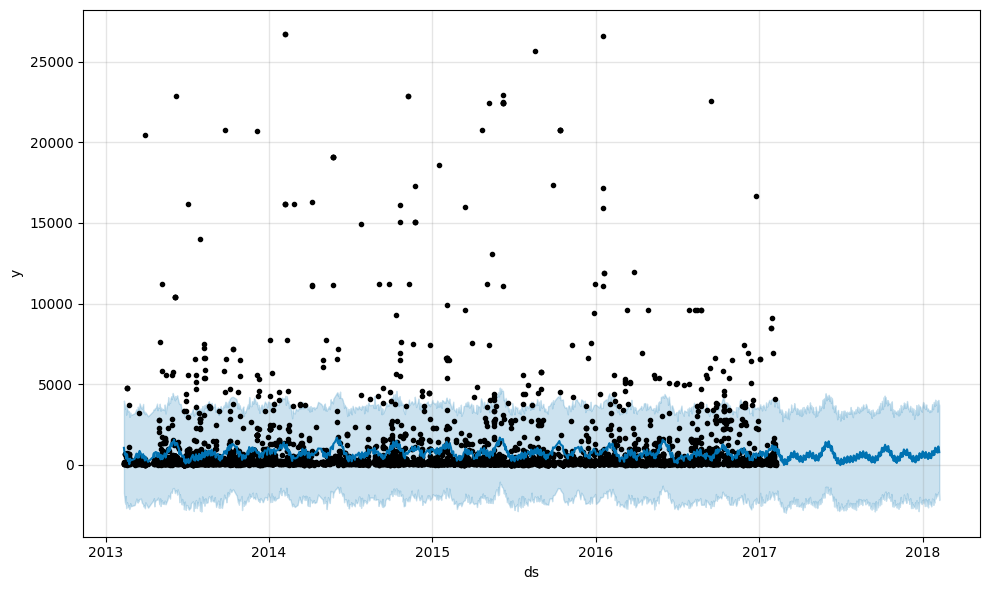

In [ ]:
import pandas as pd
from prophet import Prophet

# Load the data and clean the 'Total' column
file_path = '/content/drive/MyDrive/Retail Data/retail data.csv'
df = pd.read_csv(file_path)
df['Total'] = df['Total'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Create a DataFrame for Prophet with 'ds' and 'y' columns
prophet_df = df[['Order Date', 'Total']].rename(columns={'Order Date': 'ds', 'Total': 'y'})

# Fit the Prophet model
model_prophet = Prophet(daily_seasonality=True)
model_prophet.fit(prophet_df)

# Create a future dataframe for forecasting
future = model_prophet.make_future_dataframe(periods=365)
forecast_prophet = model_prophet.predict(future)

# Plotting the forecast
fig = model_prophet.plot(forecast_prophet)

D. LSTM (Long Short-Term Memory Neural Network)

LSTMs are deep learning models designed for sequential data, capable of capturing long-term dependencies and complex, non-linear patterns. This approach is more complex and requires libraries like TensorFlow or Keras


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Load the data and clean the 'Total' column
file_path = '/content/drive/MyDrive/Retail Data/retail data.csv'
df = pd.read_csv(file_path)
df['Total'] = df['Total'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)

# Scale the 'Total' data for the neural network
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Total'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Use your desired sequence length
seq_length = 60
X_lstm, y_lstm = create_sequences(scaled_data, seq_length)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# Build and train the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_lstm, y_lstm, epochs=10, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - loss: 0.0059
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0063
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 0.0067
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0064
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0055
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 0.0058
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0076
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.0084
Epoch 9/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.0075
Epoch 10/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0072


**Customer Analytics with K-Means Clustering**

-> Calculate RFM Values

Recency, Frequency, and Monetary values for each customer

In [ ]:
import pandas as pd
import datetime as dt

# Load the data and ensure correct data types
file_path = '/content/drive/MyDrive/Retail Data/retail data.csv'
df = pd.read_csv(file_path)

# Clean and convert the 'Order Date' and 'Total' columns
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Total'] = df['Total'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)

# Get the current date for Recency calculation
present = dt.datetime.now()

# Perform the RFM calculation with the correct column names
rfm_df = df.groupby('Customer Name').agg({
    'Order Date': lambda Order_Date: (present - Order_Date.max()).days,
    'Order No': lambda Order_No: Order_No.count(),
    'Total': lambda Total: Total.sum()
}).rename(columns={'Order Date': 'Recency', 'Order No': 'Frequency', 'Total': 'Monetary'})

# Display the result of the RFM calculation
print(rfm_df.head())

                 Recency  Frequency  Monetary
Customer Name                                
Aaron Bergman       4034         24  13728.58
Aaron Smayling      4459         13   4565.34
Adam Bellavance     4466          3   4866.27
Adam Berlavance     4466          1    601.39
Adam Hart           4212          1    147.43


-> Normalize the Data

Scale the RFM values before clustering to ensure no single feature dominates the clustering process

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

-> Determine Optimal Clusters (Elbow Method)

To find the best number of clusters (k) for your data

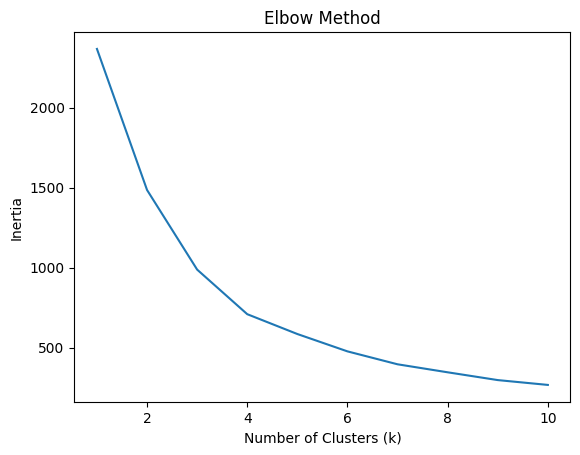

In [ ]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia to find the elbow point
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

-> Applying K-Means Clustering

 Run the K-Means algorithm and assign cluster labels to your customers

In [ ]:
optimal_k = 4 # Or the value you found from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

**Visualization and Reporting**

-> Sales Forecast Visualization: Plot actual sales against the predicted sales from chosen model

Text(0.5, 1.0, 'Sales Forecast with Prophet')

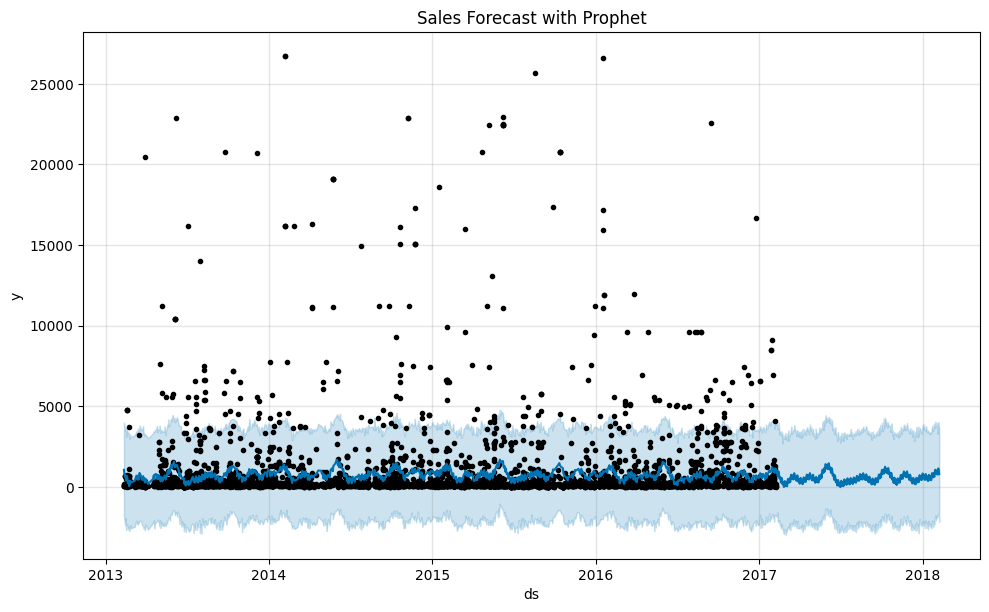

In [ ]:
# For Prophet model
fig_prophet = model_prophet.plot(forecast_prophet)
# Customize the plot with labels and titles for clarity
plt.title('Sales Forecast with Prophet')

-> Customer Segmentation Visualization: Create a scatter plot to visualize the customer clusters based on their RFM values

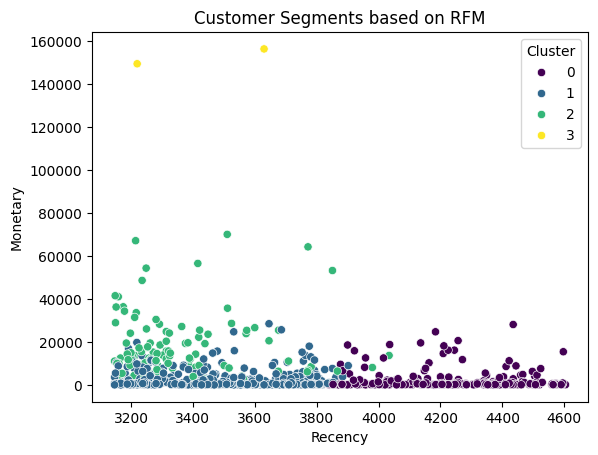

In [ ]:
import seaborn as sns
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_df, palette='viridis')
plt.title('Customer Segments based on RFM')
plt.show()+